# First look at the data

In [2]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import io_utils as iu
from importlib import reload
reload(iu)

%matplotlib inline

## The Text Data

In [3]:
words, onsets, offsets, _ = iu.load_text()

In [4]:
word_keys, word_counts = iu.word_histogram(words)

There are 1508 unique words. And 5459 words in total.
Common words take up 1008 which is about 1/5 of the data...


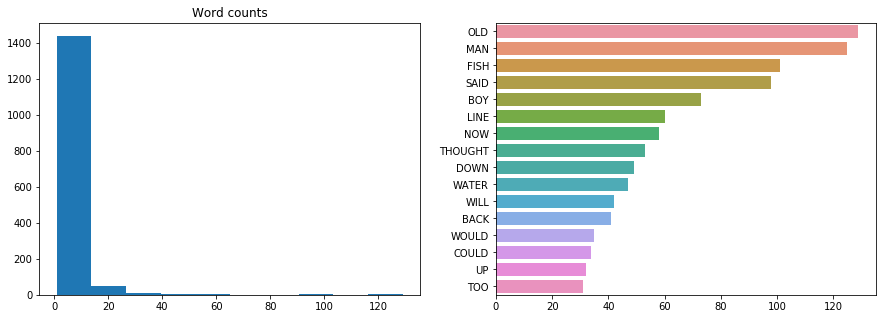

In [21]:
wc_threshold =  30
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(word_counts)
ax[0].set_title('Word counts')
sns.barplot(x=word_counts[word_counts > wc_threshold], y=word_keys[word_counts>wc_threshold], ax=ax[1]);
print(f'There are {len(word_keys)} unique words. And {sum(word_counts)} words in total.'
      +f'\nCommon words take up {sum(word_counts[word_counts > wc_threshold])} which is about 1/5 of the data...')

Most words only occur one time, which is not the best thing. 

In [22]:
word_samples_ons = iu.words_to_onsets(onsets, words, word_counts, word_keys)
word_samples_ofs = iu.words_to_onsets(offsets, words, word_counts, word_keys)

In [49]:
diff = []
for word in word_samples_ons.keys():
    w_diff = []
    tmp_on = word_samples_ons[word]
    tmp_of = word_samples_ofs[word]
    for (tn, tf) in zip(tmp_on, tmp_of):
        if len(tn) != 0:
            w_diff.append(np.max(tf - tn))
        else:
            w_diff.append(0)

    diff.append(np.max(w_diff))
    
print(f'The longest period between onset and off set of a word is {np.max(diff)} samples. Which is {np.max(diff)/128:4.2f}s')

The longest period between onset and off set of a word is 86 samples. Which is 0.67s


Even using simple classification of words (i.e. multiclass of 16 samples) will be quite hard. Similarly looking at epoching the data to max periods will only be the first step. 
But we can now epoch data based on the ``word_samples_ons`` dictionary. The onsets for each run and for each target word are in there. 

## Preprocessing EEG

In [52]:
# A single data set:
participant = 'Subject1'
eeg, mastoids = iu.load_one_subject(participant)

In [60]:
print(f'The first run for example has a duration of {eeg[0].shape[0]/128:4.2f}s')

The first run for example has a duration of 179.29s
